## The law of large numbers

#### Simulation of two coin flips to document the result two heads 'HH'

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def coin_flip_experiment():
    # defining our two coins as lists
    coin1 = ['Heads', 'Tails']
    coin2 = ['Heads', 'Tails']
    
    # "flipping" both coins randomly
    coin1_result = np.random.choice(coin1)
    coin2_result = np.random.choice(coin2)
    
    # checking if both flips are heads
    if coin1_result == 'Heads' and coin2_result == 'Heads':
        return 1
    else:
        return 0

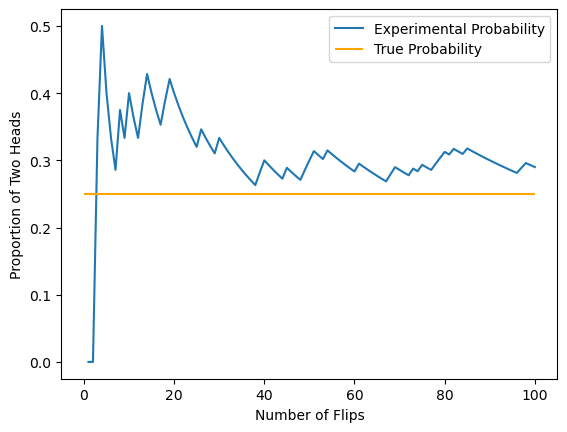

In [8]:
# how many times we run the experiment
num_trials = 100
prop = []
flips = []

# keep track of the number of times heads pops up twice
two_heads_counter = 0
 
# perform the experiment num_trials of times
for flip in range(num_trials):
  # if both coins are heads add 1 to the counter
  two_heads_counter += coin_flip_experiment()
  # keep track of the proportion of two heads at each flip 
  prop.append(two_heads_counter/(flip+1))
  # keep a list for number of flips
  flips.append(flip+1)

# plot all flips and proportion of two heads
plt.plot(flips, prop, label='Experimental Probability')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Two Heads')

plt.hlines(0.25, 0, num_trials, colors='orange', label='True Probability')
plt.legend()

plt.show()

## Probability functions

#### __Probability mass function__: ####

"In probability and statistics, __a probability mass function__ is a function that __gives the probability__ _that a __discrete random variable__ is exactly equal to __some value___." - Wikipedia

#### __Probability density function__: ####
In probability theory, a __probability density function (PDF)__, density function, or density __of an absolutely continuous random variable__, is a __function whose value at any given sample (or point)__ in the sample space (the set of possible values taken by the random variable) _can be interpreted as_ __providing a relative likelihood___ that the value of the ___random variable_ would be equal to that sample__.
[...]
In a more precise sense, the PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable's PDF over that range [...]" - WIkipedia

#### __Cumulative distribution function__: ####
"In probability theory and statistics, the __cumulative distribution function (CDF) of__ a real-valued __random variable X, [...], evaluated at x__, is the __probability that X will take a value less than or equal to x__" - Wikipedia

## Probability mass function

Given a discrete random variable and the probability mass function (pmf) indicates the probability of observing an outcome.

Codecademy_example from Sophie Sommer:
"For example, suppose that we flip a fair coin some number of times and count the number of heads. The probability mass function that describes the likelihood of each possible outcome (eg., 0 heads, 1 head, 2 heads, etc.) is called the binomial distribution. The parameters for the binomial distribution are:
    n _=_ for the number of trials (eg., n=10 if we flip a coin 10 times)
    p _=_ for the probability of success in each trial (in this example, p= 0.5 because the probability of observing heads on a fair coin flip is 0.5)
    
If we flip a fair coin 10 times, we say that the number of observed heads follows a Binomial(n=10, p=0.5) distribution. The graph below shows the probability mass function for this experiment. The heights of the bars represent the probability of observing each possible outcome as calculated by the PMF."

assings to every possible value of the discrete random variable
it's probability.

In [9]:
from IPython.display import display, SVG

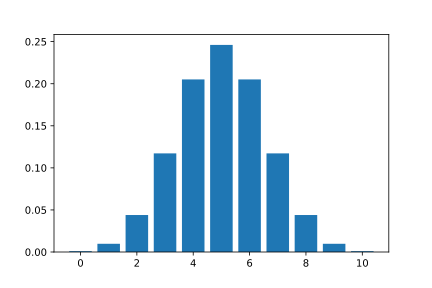

In [10]:
SVG("Distributions/binom_pmf_10_5.SVG")

### Implementation with scipy.stats 

In [11]:
from scipy.stats import binom

binom.pmf(6, n = 10, p = 0.5)

0.2050781249999999

## Cumulative Distribution Function

In [2]:
from matplotlib import image

In [4]:
# installing and importing converter from SVG to png
# pip install cairosvg
from cairosvg import svg2png

# converting img for cumulative distribution function
directory = ["Distributions/cdf-0.SVG","Distributions/cdf-1.SVG", "Distributions/cdf-2.SVG", "Distributions/cdf-3.SVG"]

for trans_num, url_ in enumerate(directory):
    svg2png(url=url_,write_to=f'Distributions/cdf-{trans_num}.png')
    
    
# transforming images for poisson distriution
svg2png(url="Distributions/poisson_lambda_3.SVG",write_to='Distributions/poisson_lambda_3.png')
svg2png(url="Distributions/poisson_lambda_15.SVG",write_to=f'Distributions/poisson_lambda_15.png')

In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize = (10,15))
fig.tight_layout()
ax[0][0].imshow(imread("Distributions/cdf-0.png"))
ax[0][1].imshow(imread("Distributions/cdf-1.png"))
ax[1][0].imshow(imread("Distributions/cdf-2.png"))
ax[1][1].imshow(imread("Distributions/cdf-3.png"))
plt.show()
plt.clf()   

NameError: name 'plt' is not defined

### Python implementation of CDF

In [60]:
from scipy import stats
## Checkpoint 1
prob_1 = stats.binom.cdf(3, n = 10, p = 0.5)
print("Prob_1 is : {} ".format(prob_1))

# compare to pmf code (checkpoint 2)
print("Comparison with binom.pmf() results when adding 0, 1, 2 and 3 {}".format(stats.binom.pmf(0, n=10, p=.5) + stats.binom.pmf(1, n=10, p=.5) + stats.binom.pmf(2, n=10, p=.5) + stats.binom.pmf(3, n=10, p=.5)))


## Checkpoint 3
prob_2 = 1- stats.binom.cdf(5, n = 10, p = 0.5)
print("Prob_2 is : {} ".format(prob_2))


## Checkpoint 4
prob_3 = stats.binom.cdf(5, n = 10, p = 0.5) - stats.binom.cdf(1, n = 10, p = 0.5)
print("Prob_3 is : {} ".format(prob_3))

# compare to pmf code (checkpoint 5)
print("Comparison with binom.pmf() results when adding 2, 3, 4 and 5 {}".format(stats.binom.pmf(2, n=10, p=.5) + stats.binom.pmf(3, n=10, p=.5) + stats.binom.pmf(4, n=10, p=.5) + stats.binom.pmf(5, n=10, p=.5)))

Prob_1 is : 0.171875 
Comparison with binom.pmf() results when adding 0, 1, 2 and 3 0.17187500000000006
Prob_2 is : 0.376953125 
Prob_3 is : 0.6123046875 
Comparison with binom.pmf() results when adding 2, 3, 4 and 5 0.6123046875


## probability density functions

### normal distribution

## REVIEW: Code implementations of probability mass function (binomial and cumulative mdistribution functions (binomial and normal)

In [61]:
import scipy.stats as stats
import numpy as np

## Exercise 1
# sampling from a 6-sided die
die_6 = range(1, 7)
print(np.random.choice(die_6, size = 5, replace = True))


## Exercise 4 - binomial probability mass function
# 6 heads from 10 fair coin flips
print(stats.binom.pmf(6, 10, 0.5))


## Exercise 6 - binomial probability mass function
# 2 to 4 heads from 10 coin flips
# P(X = 2) + P(X = 3) + P(X = 4)
print(stats.binom.pmf(2, n=10, p=.5) + stats.binom.pmf(3, n=10, p=.5) + stats.binom.pmf(4, n=10, p=.5))

# 0 to 8 heads from 10 coin flips
# 1 - (P(X = 9) + P(X = 10))
print(1 - (stats.binom.pmf(9, n=10, p=.5) + stats.binom.pmf(10, n=10, p=.5)))


## Exercise 9 - binomial cumulative distribution function
# 6 or fewer heads from 10 coin flips
print(stats.binom.cdf(6, 10, 0.5))

# more than 6 heads from 10 coin flips
print(1 - stats.binom.cdf(6, 10, 0.5))

# between 4 and 8 heads from 10 coin flips
print(stats.binom.cdf(8, 10, 0.5) - stats.binom.cdf(3, 10, 0.5))


## Exercise 10 - normal distribution cumulative distribution function
# stats.norm.cdf(x, loc, scale)
# temperature being less than 14*C
  # x = 14, loc = 20, scale = 3
print(stats.norm.cdf(14, 20, 3))


# Exercise 11
# temperature being greater than 24*C
  # x = 24, loc = 20, scale = 3
print(1 - stats.norm.cdf(24, 20, 3))

# temperature being between 21*C and 25*C
  # x = 24, loc = 20, scale = 3
print(stats.norm.cdf(25, 20, 3) - stats.norm.cdf(21, 20, 3))


[1 5 5 6 5]
0.2050781249999999
0.36621093749999994
0.9892578125
0.828125
0.171875
0.8173828125
0.022750131948179195
0.09121121972586788
0.32165098790894897


### Poisson distribution

In [82]:
import scipy.stats as stats

# generate random variable
# stats.poisson.rvs(lambda, size = num_values)
rvs = stats.poisson.rvs(10, size = 1000)
print(len(rvs))

1000


In [83]:
rvs[0:12]

array([13,  9,  7, 13, 10,  5,  8, 11,  4, 15, 11,  8], dtype=int64)

<AxesSubplot: ylabel='count'>

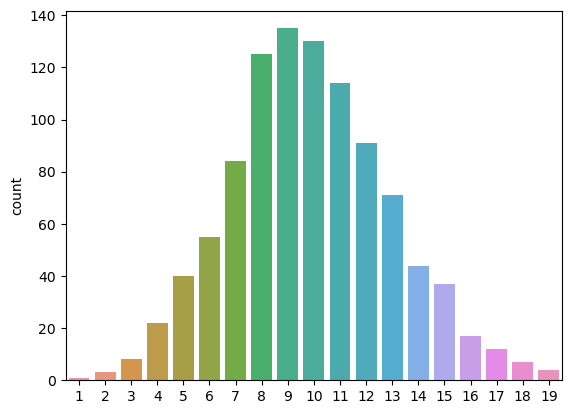

In [84]:
import seaborn as sns

sns.countplot(x = rvs)

In [85]:
print(rvs.mean())

9.87


#### Spread of the poisson distribution

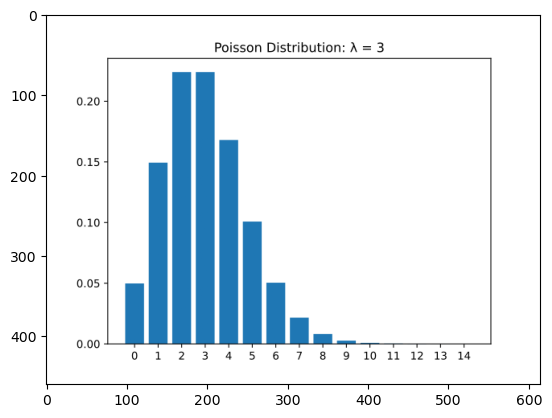

In [86]:
plt.imshow(imread("Distributions/poisson_lambda_3.png"))

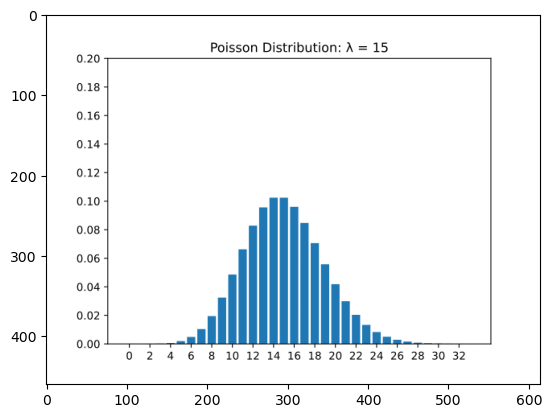

In [87]:
plt.imshow(imread("Distributions/poisson_lambda_15.png"))

In [88]:
import scipy.stats as stats
import numpy as np

## For checkpoints 1 and 2
# 5000 draws, lambda = 7
rand_vars_7 = stats.poisson.rvs(7, size = 5000)

## Checkpoint 1
# print variance of rand_vars_7
print(np.var(rand_vars_7))

## Checkpoint 2
# print minimum and maximum of rand_vars_7
print(min(rand_vars_7), max(rand_vars_7), end="\n"*2)

## For checkpoints 3 and 4
# 5000 draws, lambda = 17
rand_vars_17 = stats.poisson.rvs(47, size = 5000)

## Checkpoint 3
# print variance of rand_vars_17
print(np.var(rand_vars_17))

## Checkpoint 4
# print minimum and maximum of rand_vars_17
print(min(rand_vars_17),max(rand_vars_17))

7.1115948399999995
0 18

46.33827676
21 72


# Sampling distributions and Central limit theorem (CLT)

### Random Sampling in Python

#### Taking one random sample

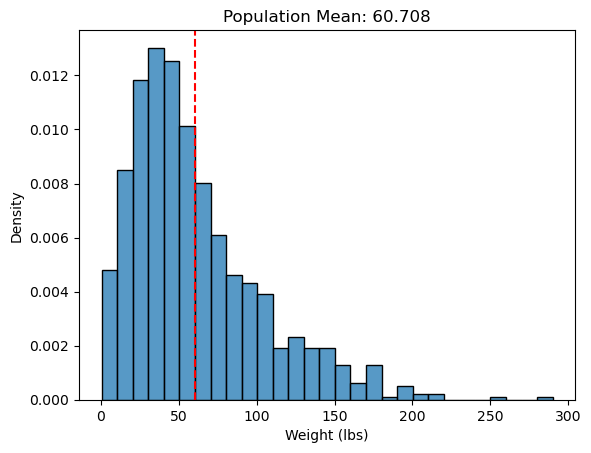

<Figure size 640x480 with 0 Axes>

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

population = pd.read_csv("Sampling distributions/salmon_population.csv")
population = np.array(population.Salmon_Weight)
pop_mean = round(np.mean(population),3)

## Plotting the Population Distribution
sns.histplot(population, stat='density')
plt.axvline(pop_mean,color='r',linestyle='dashed')
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("Weight (lbs)")
plt.show()
plt.clf() # close this plot

samp_size = 30
# Generate our random sample below
sample = np.random.choice(np.array(population), samp_size, replace = False)

### Sampling Distributions

##### Taking n random samples and plotting the sample means on a histogram

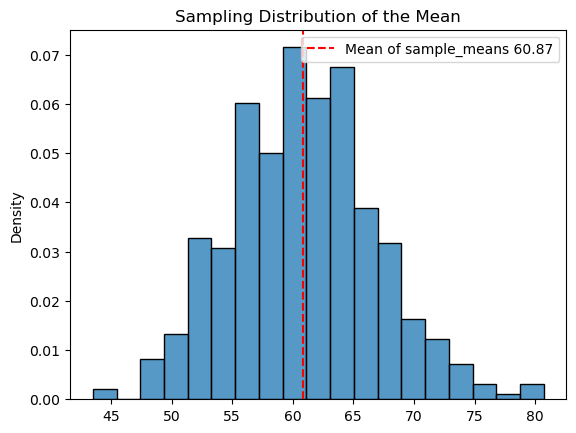

In [90]:
salmon_population = population

sample_size = 50
sample_means = []

# loop 500 times to get 500 random sample means
for i in range(500):
  # take a sample from the data:
  samp = np.random.choice(salmon_population, sample_size, replace = False)
  # calculate the mean of this sample:
  this_sample_mean = np.mean(samp)
  # append this sample mean to a list of sample means
  sample_means.append(this_sample_mean)

mean_sample_means = round(np.mean(sample_means),2)

# plot all the sample means to show the sampling distribution
sns.histplot(sample_means, stat='density')
plt.axvline(mean_sample_means,color='r',linestyle='dashed', label = f"Mean of sample_means {mean_sample_means}")
plt.title("Sampling Distribution of the Mean")
plt.legend()
plt.show()

### Central limit theorem (CLT)

Important assumptions:

    Given that the number of samples 'n' is sufficiently large (n > 30), the sampling distribution of the means will be normally distributed with:
    mean x od the sdsm approximating the population mean mu
    standard deviation of the sample equal to the standard population standard deviation divided by the square root of the sample size.

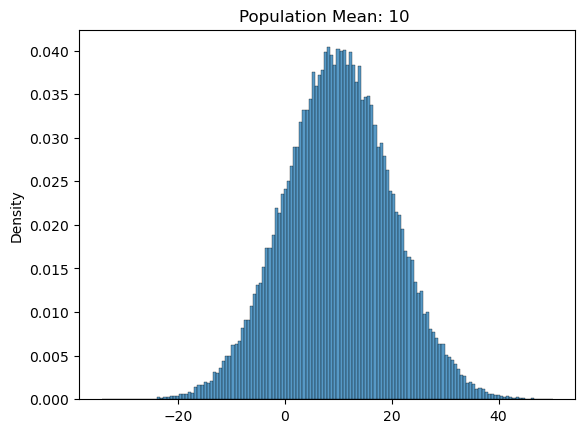

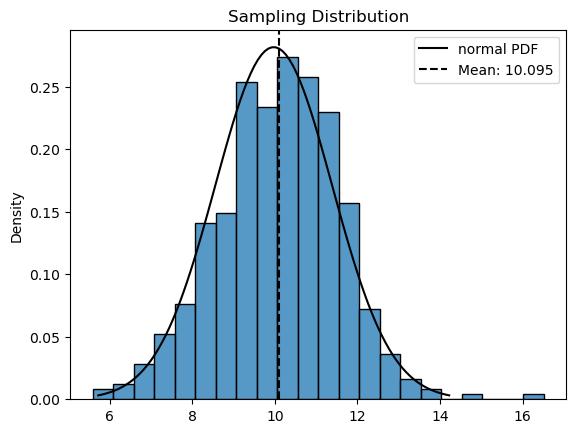

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set the population mean & standard deviation:
population_mean = 10
population_std_dev = 10
# Set the sample size:
samp_size = 50

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

# Simulate the samples and calculate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)

# Plot the original population
sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()
plt.clf()

## Plot the sampling distribution
sns.histplot(sample_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.axvline(x = mean_sampling_distribution, color = 'black', linestyle ='dashed', label = f'Mean: {mean_sampling_distribution}')
plt.title("Sampling Distribution")
plt.legend()
plt.show()

In [98]:
'''Specifically, the NumPy percentile() function can be used to calculate that 95% of the sample means 
from the above simulation fall in a range from 16.14 to 21.87 dollars per hour
(plus or minus around 2.87 dollars from the mean):
'''

percentiles = np.percentile(sample_means, [2.5, 97.5])
print(percentiles)
# output: array([16.13810156, 21.87180969])

[ 7.00997896 12.82196906]


### Defining confidence Intervals
with approximated standard error:

    std_error = sample_std / (n) ** 0.5
        
    sample_std = (x - mu)^2/(n-1)) a



In [97]:
# confience intervals (ci)
lower_ci = stats.norm.ppf(0.025, np.mean(sample_means), np.std(sample_means, ddof = 1))
upper_ci = stats.norm.ppf(0.975, np.mean(sample_means), np.std(sample_means, ddof = 1))

# by the lower and upper boundaries chosen, can be a 95 % sure, that the population mean 
# is within the given boundaries below
print(lower_ci, upper_ci)

7.136397873119823 12.680040871269481


In [99]:
# compare with actual population
np.mean(population)

10.005186321385676